In [11]:
import pandas as pd
import numpy as np
from scipy.stats import norm

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

[Source data](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights)

In [33]:
df = pd.read_csv('dataset.csv')
df.head()

,weight_pounds,height_inches,weight,height
0,112.9925,65.78331,51.360227,167.089607
1,136.4873,71.51521,62.039682,181.648633
2,153.0269,69.39874,69.557682,176.272800
3,142.3354,68.21660,64.697909,173.270164
4,144.2971,67.78781,65.589591,172.181037


In [3]:
def pounds_to_metric(pounds):
    kilograms = pounds / 2.2
    grams = kilograms * 1000
    return kilograms

def inches_to_centimeters(inches):
    return 2.54 * inches

df['weight'] = df['weight_pounds'].map(pounds_to_metric)
df['height'] = df['height_inches'].map(inches_to_centimeters)

## [Correlation](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)

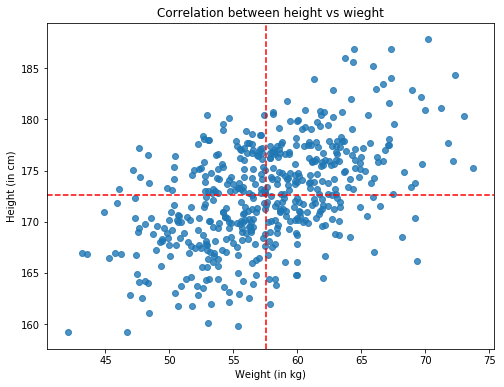

In [9]:
plt.figure(figsize=(8, 6))
plt.title('Correlation between height vs wieght')

df_s = df.sample(500)

sns.regplot(x="weight", y="height", data=df_s, fit_reg=False)
plt.ylabel('Height (in cm)')
plt.xlabel('Weight (in kg)')
plt.axvline(x=df_s.weight.mean(), color='r', linestyle='--')
plt.axhline(y=df_s.height.mean(), color='r', linestyle='--')
plt.show()

In [30]:
df.corr()

,Unnamed: 0,weight_pounds,height_inches,weight,height
Unnamed: 0,1.000000,-0.007257,0.009626,-0.007257,0.009626
weight_pounds,-0.007257,1.000000,0.502859,1.000000,0.502859
height_inches,0.009626,0.502859,1.000000,0.502859,1.000000
weight,-0.007257,1.000000,0.502859,1.000000,0.502859
height,0.009626,0.502859,1.000000,0.502859,1.000000


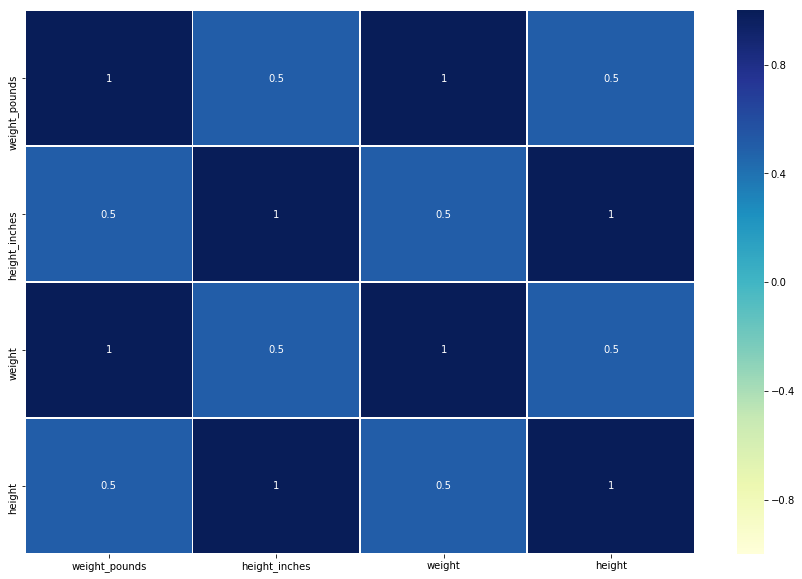

In [35]:
plt.rcParams['figure.figsize']=(15,10)
sns.heatmap(df.corr(), vmax=1., vmin=-1., annot=True, linewidths=.8, cmap="YlGnBu");

## [Normal Distribution](https://en.wikipedia.org/wiki/Normal_distribution)

In [17]:
def plot_norm_distr(mu, sigma):
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
    plt.plot(x, norm.pdf(x, mu, sigma))
    plt.xlim([-10, 10])
    plt.title('Normal distribution (mu={0}, sigma={1})'.format(mu, sigma))
    plt.show()

### [Mean](https://en.wikipedia.org/wiki/Expected_value)
*mu* means shift on horizontal (x axis)

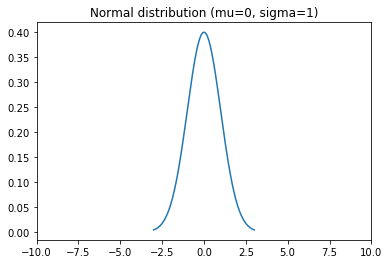

In [19]:
plot_norm_distr(mu=0, sigma=1)

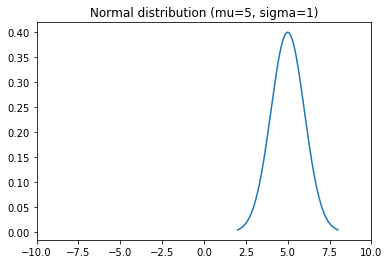

In [22]:
plot_norm_distr(mu=5, sigma=1)

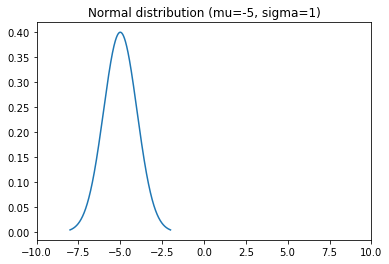

In [23]:
plot_norm_distr(mu=-5, sigma=1)

### [Standard deviation](https://en.wikipedia.org/wiki/Standard_deviation)
*sigma* - measures of the spread of the data around the mean

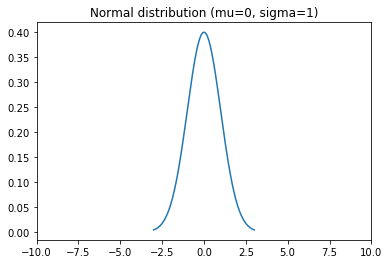

In [24]:
plot_norm_distr(mu=0, sigma=1)

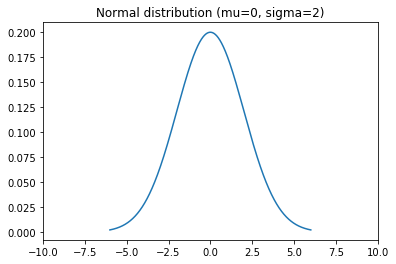

In [25]:
plot_norm_distr(mu=0, sigma=2)

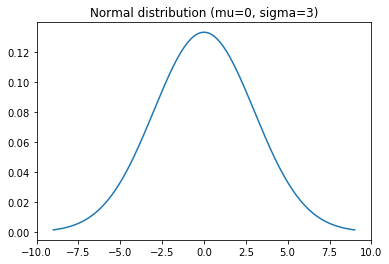

In [26]:
plot_norm_distr(mu=0, sigma=3)